In [ ]:
import numpy as np 
import flexring as flx 
from euclid3 import Vector2
import matplotlib.pyplot as plt
%matplotlib widget
def interpolate_boundary_condition(centre:Vector2,
                                   radius:float,
                                   point1:Vector2,
                                   point2:Vector2,
                                   dydx:float,
                                   ddydx:float,
                                   beta:float,
                                   direction:int):
    # given a chord or a semi chord on a circle, finds the 
    # point along the chord where separation happens
    dr_1 = (point1 - centre).magnitude() - radius
    dr_2 = (point2 - centre).magnitude() - radius
    dr_dtheta_1 = flx.polar_derivative(point= point1 - centre,dy=dydx)
    dr_dtheta_2 = flx.polar_derivative(point= point2- centre,dy= dydx)
    ddr_dtheta_1 = flx.polar_second_derivative(point1 - centre,dydx,ddydx)
    ddr_dtheta_2 = flx.polar_second_derivative(point2 - centre, dydx,ddydx)                                           
    print(f"r1: {dr_1}\nr2: {dr_2}\ndr1:{dr_dtheta_1}\ndr2: {dr_dtheta_1}\nddr1: {ddr_dtheta_1}\nddr2: {ddr_dtheta_2}")
    
    # condition is true when lhs > rhs
    # we calculate lhs and rhs at point1 and point2 and linearly interpolate
    # to find the point where they cross
    lhs_1 = 0.5*ddr_dtheta_1
    lhs_2 = 0.5*ddr_dtheta_2
    rhs_1 = -2*(beta**2)*(direction*dr_dtheta_1/beta + dr_1)
    rhs_2 = -2*(beta**2)*(direction*dr_dtheta_2/beta + dr_2)
    t = (rhs_1 - lhs_1)/((lhs_2-lhs_1)-(rhs_2 - rhs_1))# where rhs == lhs
    return point1 + t*(point2 - point1), t

beta = 3
t = np.linspace(0 , 1 , 100)
radius = 0.35
distance_to_edge = np.linspace(radius - 0.01 , radius-0.1, 100)
angles = np.deg2rad(np.linspace(170, 10, 160))
tyre_centres = [[Vector2(r*np.cos(theta), r*np.sin(theta))for r in distance_to_edge] for theta in angles]
p2 = Vector2(1, 0)
p1 = Vector2(0 , 0)
dydx = (p2.y - p1.y)/(p2.x - p1.x)
ddydx = -2500
get_rhs = lambda P : -2*(beta**2)*(flx.polar_derivative(P , 0)/beta + P.magnitude()-radius)
is_boundary = lambda tyre_centre, point : (0.5*flx.polar_second_derivative(
    point - tyre_centre, dydx, ddydx)>
        get_rhs(point- tyre_centre))
is_boundary(tyre_centres[0][0], p1)
###### 
plt.plot([p1.x, p2.x], [p1.y , p2.y], marker=".", color= "black")
for t in tyre_centres:
    if(is_boundary(t[0] , p1)):
        plt.plot(t[0].x , t[0].y , 'r*')
    else:
        plt.plot(t[0].x , t[0].y , 'g*')
plt.gca().set_aspect("equal")
plt.show()


In [ ]:
import flexring as flx
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from euclid3 import Vector2
%matplotlib widget
road = flx.Road(
                step_width=0.01,
                step_height=0.08,
                step_profile_phase=np.pi
                )

fig,ax =plt.subplots(3 , 1, sharex=True)
ax[0].plot(road.x , road.y , marker=".")
ax[1].plot(road.x, road.dydx, marker=".")
ax[2].plot(road.x , road.ddydx, marker=".")
cum_distance = [(road.points[idx+1] - road.points[idx]).magnitude() for idx in range(len(road.points)-1)]
cum_distance.insert(0 , 0)
cum_distance = np.cumsum(cum_distance)
uniform_distance = np.arange(start=0, stop = cum_distance[-1], step=0.001)
x_interpolator = interpolate.interp1d(x = cum_distance, y = road.x,kind="linear")
y_interpolator = interpolate.interp1d(x = cum_distance, y = road.y , kind="linear")
over_sampled_points = [Vector2(x_interpolator(d) , y_interpolator(d)) for d in uniform_distance]
X = np.array([v.x for v in over_sampled_points])
Y = np.array([v.y for v in over_sampled_points])
ax[0].plot(X , Y , "*")
#plt.xlim((2.49, 2.51))



In [ ]:
a = [1 , 2 , 3 , None, 4 , None]
while True:
    try:
        a.remove(None)
    except:
        break

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib widget
beta = 8
theta = np.linspace(0 , 10, 900)
A = 1
B = 100
deflection = np.exp(-beta*theta)*(A*np.cos(beta*theta) + B*np.sin(beta*theta))*np.cos(theta)
numerical_integral = np.trapz(y=deflection, x = theta)
analytic_integral = beta*(2*(A + B)*beta**2 + A - B)/(4*beta**4+1)
print(f"numerical:\t{numerical_integral:.3f}\nanalytical:\t{analytic_integral:.3f}\n")
plt.plot(theta, deflection)
plt.show()

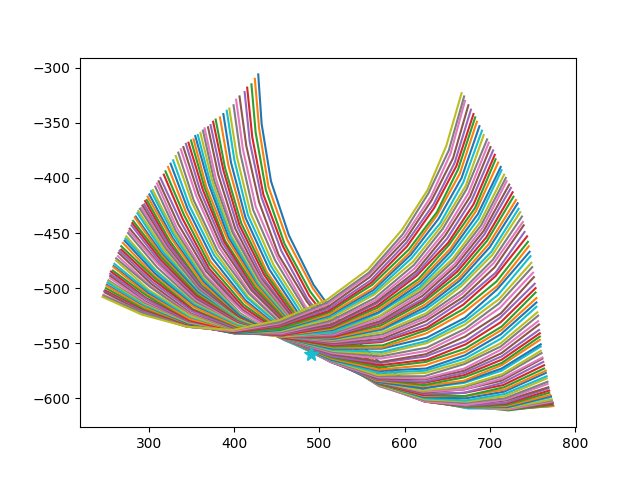

[487 428 306]


In [13]:
# example parser 
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import io
%matplotlib widget
step_x = 490
step_y = 560
point_data = []
with open('../../KerbImpact/tracking_data/tracking.txt') as f:
    while(line:=f.readline()):
        point_data.append(np.array([re.findall(r'\d+', s)[0:3] for s in line.split(';')]))
sorted_points = np.array(np.int32(sorted(point_data, key= lambda p:p[0 , 1])))
sorted_points[: , 0 , 1]
plt.cla()
i = 0
while i < len(sorted_points[0 , : , 0]):
    plt.plot(sorted_points[: , i, 1], -sorted_points[: , i, 2])
    i+=10
plt.plot(step_x , -step_y , "*", markersize=10)
plt.show()

print(sorted_points[0 , 0, 0:10])
# io.savemat("/Users/mahdibabayi/beam_tyre/KerbImpact/tracked_points.mat", 
#            {"frame_num":sorted_points[: , : , 0], "x": sorted_points[: , : , 1], "y":sorted_points[: , : , 2]})
io.savemat("/Users/mahdibabayi/beam_tyre/KerbImpact/tracked_points.mat",
           {"frames": sorted_points})